In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [50]:
dataset = pd.read_csv('D:\\uni\\2курс\Аналіз_даних\DataAnalysis_code\lab4\groceries - groceries.csv')
dataset.head(15)

<>:1: DeprecationWarning: invalid escape sequence '\D'
<>:1: DeprecationWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_26980\1787650419.py:1: DeprecationWarning: invalid escape sequence '\D'
  dataset = pd.read_csv('D:\\uni\\2курс\Аналіз_даних\DataAnalysis_code\lab4\groceries - groceries.csv')


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
dataset.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [52]:
dataset = dataset.drop(columns=['Item(s)'])
dataset.head(15)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
transactions = dataset.values.astype(str).tolist()
transactions = [[item for item in row if item != 'nan'] for row in transactions]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [54]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [55]:
df.head(15)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [56]:
fpgrowth(df, min_support=0.01)

,support,itemsets
0,0.082766,(31)
1,0.058566,(89)
2,0.017692,(133)
3,0.139502,(167)
4,0.104931,(158)
...,...,...
328,0.010168,"(64, 123)"
329,0.012405,"(64, 167)"
330,0.014235,"(100, 103)"
331,0.012100,"(100, 166)"


In [57]:
fp_itemset = fpgrowth(df, min_support=0.01, use_colnames=True)
fp_itemset.head(15)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
5,0.058058,(coffee)
6,0.255516,(whole milk)
7,0.075648,(pip fruit)
8,0.039654,(cream cheese)
9,0.193493,(other vegetables)


Confidence

In [58]:
rules = association_rules(fp_itemset, metric="confidence", min_threshold=0.40)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [59]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['confidence'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
3,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,1.949059
14,"(tropical fruit, root vegetables)",(other vegetables),0.012303,0.584541,3.020999,1.941244
26,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125,1.782567
20,"(other vegetables, butter)",(whole milk),0.011490,0.573604,2.244885,1.745992
15,"(tropical fruit, root vegetables)",(whole milk),0.011998,0.570048,2.230969,1.731553
41,"(yogurt, root vegetables)",(whole milk),0.014540,0.562992,2.203354,1.703594
54,"(other vegetables, domestic eggs)",(whole milk),0.012303,0.552511,2.162336,1.663694
49,"(yogurt, whipped/sour cream)",(whole milk),0.010880,0.524510,2.052747,1.565719
40,"(rolls/buns, root vegetables)",(whole milk),0.012710,0.523013,2.046888,1.560804
16,"(other vegetables, pip fruit)",(whole milk),0.013523,0.517510,2.025351,1.543003


In [60]:
rules_plot_conf = []
for conf in np.linspace(0,1,20):
    rules = association_rules(fp_itemset, metric="confidence", min_threshold=conf)
    rules_plot_conf.append(len(rules))

Text(0, 0.5, 'nr of rules')

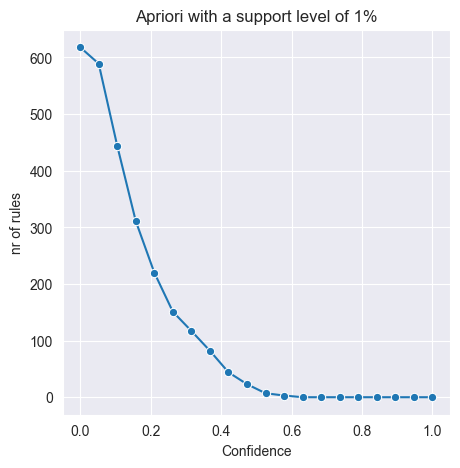

In [61]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conf,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Confidence')
plt.ylabel('nr of rules')

Lift

In [62]:
rules = association_rules(fp_itemset, metric ="lift", min_threshold = 1)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [63]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['lift'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
256,(curd),"(yogurt, whole milk)",0.010066,0.188931,3.372304,1.163866
253,"(yogurt, whole milk)",(curd),0.010066,0.179673,3.372304,1.154078
28,"(other vegetables, citrus fruit)",(root vegetables),0.010371,0.359155,3.295045,1.390354
33,(root vegetables),"(other vegetables, citrus fruit)",0.010371,0.095149,3.295045,1.073242
522,"(yogurt, other vegetables)",(whipped/sour cream),0.010168,0.234192,3.267062,1.212206
527,(whipped/sour cream),"(yogurt, other vegetables)",0.010168,0.141844,3.267062,1.114697
116,"(tropical fruit, other vegetables)",(root vegetables),0.012303,0.342776,3.144780,1.355705
121,(root vegetables),"(tropical fruit, other vegetables)",0.012303,0.112873,3.144780,1.086776
262,(beef),(root vegetables),0.017387,0.331395,3.040367,1.332628
263,(root vegetables),(beef),0.017387,0.159515,3.040367,1.127366


In [64]:
rules_plot_lift = []
for lift in np.linspace(0,4,20):
    rules = association_rules(fp_itemset, metric="lift", min_threshold=lift)
    rules_plot_lift.append(len(rules))

Text(0, 0.5, 'nr of rules')

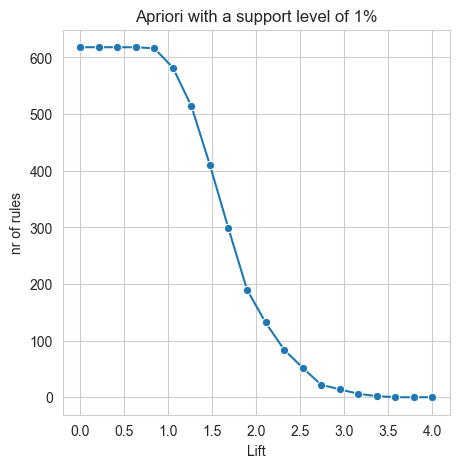

In [65]:
plt.rcParams['figure.figsize']=5,5
sns.set_style('whitegrid')
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('nr of rules')

Support

In [66]:
rules = association_rules(fp_itemset, metric ="support", min_threshold = 0.01)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [67]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['support'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
172,(other vegetables),(whole milk),0.074835,0.386758,1.513634,1.214013
173,(whole milk),(other vegetables),0.074835,0.292877,1.513634,1.140548
198,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,1.075696
199,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,1.048452
51,(whole milk),(yogurt),0.056024,0.219260,1.571735,1.102157
50,(yogurt),(whole milk),0.056024,0.401603,1.571735,1.244132
388,(whole milk),(root vegetables),0.048907,0.191405,1.756031,1.101913
389,(root vegetables),(whole milk),0.048907,0.448694,1.756031,1.350401
384,(other vegetables),(root vegetables),0.047382,0.244877,2.246605,1.179941
385,(root vegetables),(other vegetables),0.047382,0.434701,2.246605,1.426693


In [68]:
rules_plot_supp = []
for supp in np.linspace(0,1,20):
    rules = association_rules(fp_itemset, metric="support", min_threshold=supp)
    rules_plot_supp.append(len(rules))

Text(0, 0.5, 'nr of rules')

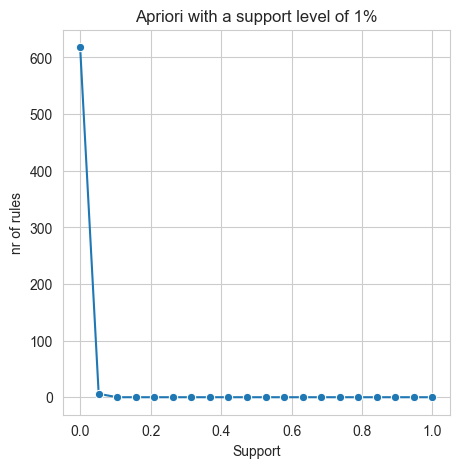

In [69]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_supp,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Support')
plt.ylabel('nr of rules')

Conviction

In [70]:
rules = association_rules(fp_itemset, metric ="conviction", min_threshold = 0.01)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [71]:
rules.loc[:,['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].sort_values(by=['conviction'], ascending=False).head(15)

,antecedents,consequents,support,confidence,lift,conviction
32,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,1.949059
121,"(tropical fruit, root vegetables)",(other vegetables),0.012303,0.584541,3.020999,1.941244
260,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125,1.782567
191,"(other vegetables, butter)",(whole milk),0.011490,0.573604,2.244885,1.745992
127,"(tropical fruit, root vegetables)",(whole milk),0.011998,0.570048,2.230969,1.731553
415,"(yogurt, root vegetables)",(whole milk),0.014540,0.562992,2.203354,1.703594
591,"(other vegetables, domestic eggs)",(whole milk),0.012303,0.552511,2.162336,1.663694
403,"(rolls/buns, root vegetables)",(other vegetables),0.012201,0.502092,2.594890,1.619792
421,"(yogurt, root vegetables)",(other vegetables),0.012913,0.500000,2.584078,1.613015
543,"(yogurt, whipped/sour cream)",(other vegetables),0.010168,0.490196,2.533410,1.581995


In [72]:
rules_plot_conv = []
for conv in np.linspace(0,1,20):
    rules = association_rules(fp_itemset, metric="conviction", min_threshold=conv)
    rules_plot_conv.append(len(rules))

Text(0, 0.5, 'nr of rules')

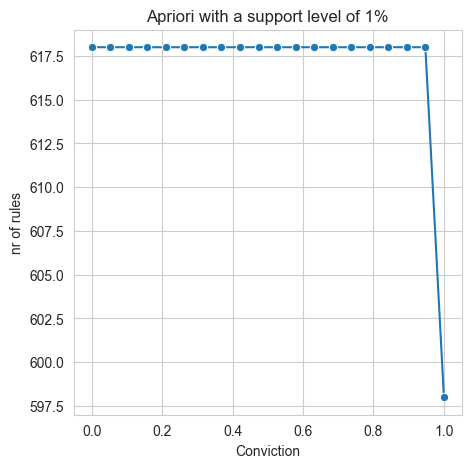

In [73]:
plt.rcParams['figure.figsize']=5,5
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conv,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Conviction')
plt.ylabel('nr of rules')